In [3]:
import numpy as np
import scipy.stats as ss 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

# Hypothesis Testing
1. Define $H_0$ and $H_1$, aka the *null hypothesis* and the *alternate hypothesis*.
2. Assume $H_0$ to be true
3. Compute a **test statistic** to assess the strength of the evidence against $H_0$.
4. Compute the **P-value** of the test statistic, aka the observed significance level.
5. State a conclusion about the strength of the evidence against $H_0$.

## Large sample tests for a population (n>30)

Let $X_1 \dots X_n$ be a large (e.g. n>30) sample from a population with mean $\mu$ and standard deviation $\sigma$.   
To test a null hypothesis of the form $H_0:\mu\leq\mu_0$, $H_0:\mu\geq\mu_0$, or $H_0:\mu=\mu_0$  
  
Compute the z-score: $z=\frac{\bar{X}-\mu_0}{\sigma/\sqrt{n}}$  
If $\sigma$ is unknown it may be approximated with $s$.  
  
Compute the P-value. The P-value is the area under the normal curve (the statistical test for large populations) which depends on the alternative hypothesis as follows:  

| Alternate Hypothesis | P-value   |
|------|------|
|   $H_1:\mu>\mu_0$  | Area to the right of z|
|   $H_1:\mu<\mu_0$  | Area to the left of z|
|   $H_1:\mu\neq\mu_0$  | Sum of the areas in the tails cut off by z and -z|


### Example of area to the left of z
45 ball bearings are sampled for wear (a reduction in diameter of the ball). The average wear (on the 45 samples) reduced the diameter by $673\mu m$ with a standard deviation of $14.9\mu m$. Assume the specification requires the mean wear to be less than $675\mu m$.  
Find the P-value for testing $H_0:\mu\geq675$ versus $H_1:\mu<675$ 
  
  
Therefore $\bar{X} = 673.5$ and $s=14.9$.

#### First calculate the z-score

In [5]:
n = 45
mu_0 = 675
x_bar = 673
s = 14.9
z_score = (x_bar-mu_0)/(s/np.sqrt(n))
print('The z-score is: ', z_score)

The z-score is:  -0.900430058054


#### Calculate the P-value

In [6]:
p_value= ss.norm.sf(abs(z_score))
print('The p-value is: ', p_value)

The p-value is:  0.183945715388


Therefore if $H_0$ is true, there is a 20.9% chance to observe a sample whose disagreement with $H_0$ is as least as great as that which was actually observed. Since 0.209 isn't small, we do not reject $H_0$. Therefore we conclude that $H_0$ is plausible. (We are not concluding that $H_0$ is "true", just plausible).

In [7]:
def left_tail_plot(nd,X,mean,sd):
    
    x = np.linspace(mean-4*sd, mean+4*sd, 5000)
    y_cdf = ss.norm.pdf(x,mean, sd)
    plt.plot(x, y_cdf, label='cdf')
    if X < mean:
        lo = mean-4*sd
        hi = X
        lo2 = (mean-X)+mean
        hi2 = mean+4*sd
    else:
        lo = mean-4*sd
        hi = (mean-X)+mean
        lo2 = X
        hi2 = mean+4*sd
    x = np.linspace(lo, hi, 5000)
    x2 = np.linspace(lo2, hi2, 5000)
    plt.fill_between(x, nd.pdf(x), y2=0, where= x >= lo , \
                     interpolate=False, \
                     color='blue', alpha = 0.2)

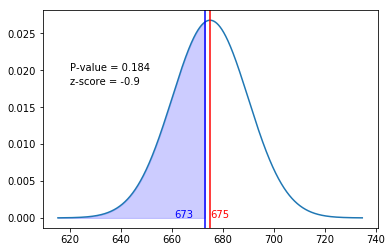

In [8]:
nd = ss.norm(mu_0, s)
left_tail_plot(nd,x_bar,mu_0,s)
plt.axvline(x=mu_0, color='r')
plt.annotate(mu_0, (mu_0,0),color='r')
plt.axvline(x=x_bar, color='b')
plt.annotate(x_bar, (x_bar-12,0),color='b')
txt = 'P-value = ' + str(round(p_value,3))
txt2 = 'z-score = ' + str(round(z_score,3))
plt.annotate(txt, (620,0.02))
plt.annotate(txt2, (620,0.018))
plt.show()

### Example of Between Tails

A scale is to be calibrated by weighing a 1000g test weight 60 times. The 60 readings have a mean of 1000.6g and standard deviation of 2g.  
Find the P-value for testing $H_0:\mu=1000$ versus $H_1:\mu\neq1000$  
We assume that 1000g is the population mean, and therefore we want to prove that values much larger or much smaller than the mean would provide evidence agains $H_0$ being true.

#### Calculate z-score

In [13]:
n = 60
mu_0 = 1000
x_bar = 1000.6
s = 2
z_score = (x_bar-mu_0)/(s/np.sqrt(n))
print('The z-score is: ', z_score)

The z-score is:  2.32379000772


#### Calculate P-value

In [10]:
p_value= ss.norm.sf(abs(z_score))
print('The p-value is: ', p_value)

The p-value is:  0.5


#### However this is a two tail
Calculate both tails (2 x p-value)

In [14]:
p_value*2
print('The p-value is: ', p_value)

The p-value is:  0.5


Therefore there is a 0.02 probability that the result is as extreme or more extreme than the value observed. The evidence against $H_0$ is pretty strong (p<0.05), so it must be rejected and the scale would need to be recalibrated.

In [15]:
def two_tails_plot(nd,X,mean,sd):
    
    x = np.linspace(mean-3*sd, mean+3*sd, 5000)
    y_cdf = ss.norm.pdf(x,mean, sd)
    plt.plot(x, y_cdf, label='cdf')
    if X < mean:
        lo = mean-3*sd
        hi = X
        lo2 = (mean-X)+mean
        hi2 = mean+3*sd
    else:
        lo = mean-3*sd
        hi = (mean-X)+mean
        lo2 = X
        hi2 = mean+3*sd
    x = np.linspace(lo, hi, 5000)
    x2 = np.linspace(lo2, hi2, 5000)
    plt.fill_between(x, nd.pdf(x), y2=0, where= x >= lo , \
                     interpolate=False, \
                     color='blue', alpha = 0.2)
    plt.fill_between(x2, nd.pdf(x2), y2=0, where= x2 >= lo2 , \
                     interpolate=False, \
                     color='blue', alpha = 0.2)

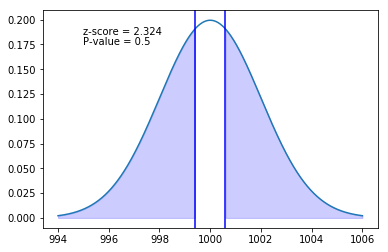

In [16]:
nd = ss.norm(mu_0, s)
two_tails_plot(nd,x_bar,mu_0,s)
txt = 'P-value = ' + str(round(p_value,3))
txt2 = 'z-score = ' + str(round(z_score,3))
#plt.xlim(999.4, 1000.6)     # set the xlim to left, right
plt.axvline(x=x_bar, color='b')
plt.axvline(x=mu_0-(x_bar-mu_0), color='b')
txt = 'P-value = ' + str(round(p_value,3))
txt2 = 'z-score = ' + str(round(z_score,3))
plt.annotate(txt, (995,0.175))
plt.annotate(txt2, (995,0.185))
plt.show()

## Test for a Population Proportion

Let $X$ be the number of successes in $n$ independent Bernoulli Trials each with success probability $p$, i.e. $X~Bin(n,p)$.   
To test a null hypothesis of the form $H_0:p\leq p_0$, $H_0:p\geq p_0$, or $H_0:p=p_0$, assuming $np_0$ and $n(1-p_0)$ are greater than 10.  
  
Compute the z-score: $z=\frac{\hat{p}-p_0}{\sqrt{p_0(1-p_0)/n}}$  
  
Compute the P-value. The P-value is the area under the normal curve (the statistical test for large number of trials) which depends on the alternative hypothesis as follows:  

| Alternate Hypothesis | P-value   |
|------|------|
|   $H_1:p>p_0$  | Area to the right of z|
|   $H_1:p<p_0$  | Area to the left of z|
|   $H_1:p\neq p_0$  | Sum of the areas in the tails cut off by z and -z|



### Example of area to the right of z

In a sample of 67 students studying petroleum engineering, 45 said that field work improved their ability to handle unforeseen problems. Can we conclude that more than 65% of students find that field work improves their ability to handle unforeseen problems?

$H_0:p\leq 0.65$ vs. $H_1:p>0.65$  
The sample proportion is $\hat{p}=45/67=0.6716$. Under the null hypothesis, $\hat{p}$ is normally distributed with mean of 0.65 and standard deviation of $\sqrt{(0.65)(1-0.65)}=0.0583$

#### Calculate z-score

In [18]:
n = 67
p_hat = 0.6716
p_0 = .65
s = np.sqrt(p_0*(1-p_0))
z_score = (p_hat-p_0)/(s/np.sqrt(n))
print('The z-score is: ', z_score)

The z-score is:  0.37068110758


#### Calculate P-value

In [19]:
p_value= ss.norm.sf(abs(z_score))
print('The p-value is: ', p_value)

The p-value is:  0.355437531705


We cannot conclude that more than 65% of students find that field work improves their ability to handle unforeseen problems.

In [20]:
def right_tail_plot(nd,X,mean,sd):
    
    x = np.linspace(mean-3*sd, mean+3*sd, 5000)
    y_cdf = ss.norm.pdf(x,mean, sd)
    plt.plot(x, y_cdf, label='cdf')
    if X < mean:
        lo = mean-3*sd
        hi = X
        lo2 = (mean-X)+mean
        hi2 = mean+3*sd
    else:
        lo = mean-3*sd
        hi = (mean-X)+mean
        lo2 = X
        hi2 = mean+3*sd
    x = np.linspace(lo, hi, 5000)
    x2 = np.linspace(lo2, hi2, 5000)
    plt.fill_between(x2, nd.pdf(x2), y2=0, where= x2 >= lo2 , \
                     interpolate=False, \
                     color='blue', alpha = 0.2)

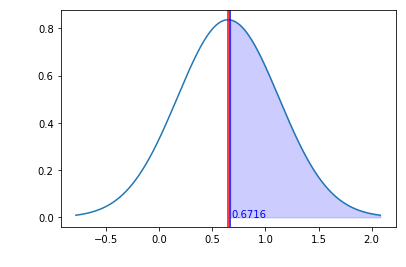

In [21]:
nd = ss.norm(p_0, s)
right_tail_plot(nd,p_hat,p_0,s)
plt.axvline(x=p_0, color='r')
plt.axvline(x=p_hat, color='b')
plt.annotate(p_hat, (p_hat+0.01,0),color='b')
txt = 'P-value = ' + str(round(p_value,3))
txt2 = 'z-score = ' + str(round(z_score,3))
plt.annotate(txt, (0.5,6))
plt.annotate(txt2, (0.5,5.5))
plt.show()

## Small-Sample tests for a population mean (n<30)

Let $X_1 \dots X_n$ be a sample from a small (e.g. n<30) *normal* population with mean $\mu$ and standard deviation $\sigma$, where $\sigma$ is unknown.   
To test a null hypothesis of the form $H_0:\mu\leq\mu_0$, $H_0:\mu\geq\mu_0$, or $H_0:\mu=\mu_0$  
  
Compute the t statistic: $t=\frac{\bar{X}-\mu_0}{s/\sqrt{n}}$  
 
  
Compute the P-value. The P-value is the area under the Student's t curve (the statistical test for small samples) with $n-1$ degrees of freedom which depends on the alternative hypothesis as follows:  

| Alternate Hypothesis | P-value   |
|------|------|
|   $H_1:\mu>\mu_0$  | Area to the right of t|
|   $H_1:\mu<\mu_0$  | Area to the left of t|
|   $H_1:\mu\neq\mu_0$  | Sum of the areas in the tails cut off by t and -t|
  
If $\sigma$ is known do the z test instead like a large sample as shown above. 

### Two tailed t test example

Drill collar spacers have a thickness specification of 38.98-39.02mm. The process is supposed to be calibrated to make a 39.00mm thickness. A sample of six collars is measured and obtained the following values 39.030, 38.997, 39.012, 39.008, 39.019, and 39.002. Assume the population of thicknesses should be normal. Can we conclude that the process needs to be recalibrated?  

Testing $H_0:\mu=39.00$ versus $H_1:\mu\neq 39.00$ 

#### Calculate t (DOF = n-1 = 6-1 = 5)

In [22]:
xs = [39.030,38.997,39.012,39.008,39.019,39.002]
n = len(xs)
dof = n-1
mu_0 = 39.00
x_bar =np.mean(xs)
s = np.std(xs,ddof=n-dof)
t_score = (x_bar-mu_0)/(s/np.sqrt(n))
print('The t-score is: ', t_score)

The t-score is:  2.32745723261


#### Calculate two tailed p-value and find areas under the curves

In [28]:
p_value= 2*ss.t.sf(abs(t_score),dof)
print('The p-value is: ', p_value)

The p-value is:  0.0674243834189


The p-value lands between 0.05 and 0.1, therefore it isn't conclusive that the machine is out of calibration, but there is reason to have doubts because it is greater than 0.05. This would prescribe further sampling.

In [ ]:
nd = ss.norm(mu_0, s)
two_tails_plot(nd,x_bar,mu_0,s)
plt.axvline(x=x_bar, color='b')
plt.axvline(x=mu_0-(x_bar-mu_0), color='b')
plt.axvline(x=38.98, ymin=0, ymax=.25, color='r')
plt.axvline(x=39.02, ymin=0, ymax=.25,color='r')
txt = 'P-value = ' + str(round(p_value,3))
txt2 = 't-score = ' + str(round(t_score,3))
plt.annotate(txt, (38.965,30))
plt.annotate(txt2, (38.965,25))
plt.show()

## Large-sample Tests for the Difference between two means

Let $X_1 \dots X_n$ and $Y_1 \dots Y_n$ be a large (e.g. $n_X>30$ and $n_Y>30$) samples from populations with means $\mu_X$ and $\mu_Y$ and standard deviations of $\sigma_X$ and $\sigma_Y$. Assume the samples are drawn independently of each other.   
To test a null hypothesis of the form $H_0:\mu_X-\mu_Y\leq\Delta_0$, $H_0:\mu_X-\mu_Y\geq\Delta_0$, or $H_0:\mu_X-\mu_Y=\Delta_0$  
  
Compute the z-score: $z=\frac{(\bar{X}-\bar{Y})-\Delta_0}{\sqrt{\sigma_X^2/n_X+\sigma_Y^2/n_Y}}$  
If $\sigma_X$ and $\sigma_Y$ are unknown they may be approximated with $s_X$ and $x_Y$ respectively.  
  
Compute the P-value. The P-value is the area under the normal curve (the statistical test for large populations) which depends on the alternative hypothesis as follows:  

| Alternate Hypothesis | P-value   |
|------|------|
|   $H_1:\mu_X-\mu_Y>\Delta_0$  | Area to the right of z|
|   $H_1:\mu_X-\mu_Y<\Delta_0$  | Area to the left of z|
|   $H_1:\mu_X-\mu_Y\neq\Delta_0$  | Sum of the areas in the tails cut off by z and -z|

### Example of two-tailed mean comparison
Two different core samples are collected from a field. Pore sizes are measured to find the diameters. **Core A** gave 544 samples with average diameter of $0.37\mu m$ with a standard deviation of $0.25\mu m$. **Core B** gave 581 samples with average diameter of $0.40\mu m$ with a standard deviation of $0.26\mu m$.  
  
Can you conclude that the mean diameters of the pores differ between the two cores?

#### Form the hypothesis

$H_0:\mu_X-\mu_Y=0$ versus $H_1:\mu_X-\mu_Y\neq0$ 

In [29]:
n_x= 544 
n_y= 581
mu_x= 0.37
mu_y= .4
s_x= 0.25
s_y= 0.26

In [30]:
diff= mu_x-mu_y
print('The difference is:', diff)

The difference is: -0.030000000000000027


In [33]:
sdev= np.sqrt(s_x**2/n_x+s_y**2/n_y)
print('The standard deviation of means is:',sdev)

The standard deviation of means is: 0.0152066046389


#### Calculate the z-score

In [34]:
z_score = (diff-0)/sdev
print('The z_score is:', z_score)

The z_score is: -1.9728269862


#### Calculate P-value

In [38]:
p_value= 2*ss.norm.sf(abs(z_score))
print('The p-value is: ', p_value)

The p-value is:  0.0485152774649


Following the 0.05 rule, we are correct in being skeptical about the truth of the Null hypothesis, thus we reject it.